In [ ]:
!cat /proc/cpuinfo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load the model
model = VGG16()


553476096/553467096 [==============================] - 3s 0us/step


In [3]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
folder = '/content/drive/MyDrive/Mahdi PhD/Papers/Code/image1/'
folder2 = '/content/drive/MyDrive/Mahdi PhD/Papers/Code/image2/'

In [ ]:
# from matplotlib import pyplot
# import random
# from matplotlib.image import imread
# # define location of dataset

# # plot first few images
# i = random.randint(1,98)
# # define subplot
# pyplot.subplot(330 + 1 + i)
# # define filename
# filename = folder + 'image- (' + str(i) + ').jpg'
# # load image pixels
# image = imread(filename)
# # plot raw pixel data
# pyplot.imshow(image)
# # show the figure
# pyplot.show()

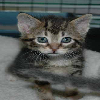

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import random

i = random.randint(2,97)
# img_path = "/content/drive/MyDrive/Mahdi PhD/Papers/Code/Image/image-1.jpg"
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)


filename = folder + 'image- (' + str(i+1) + ').jpg'
img = image.load_img(filename,color_mode='rgb', target_size=(100, 100, 3))
display(img)  


In [ ]:
import time
import os
import statistics

imageSize = []
ave = []
predictTimeFile = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/predictTime2.txt', 'w')
aveFile = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTime2.txt', 'w')

for i in range(100):
  predictTime = []
  filename = folder + 'image- (' + str(i+1) + ').jpg'
  image = load_img(filename, target_size=(224, 224,3))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)

  for j in range(50):
    # predict the probability across all output classes
    start_time = time.time()
    yhat = model.predict(image)
    end_time = round((time.time() - start_time + 0.0001),3)
    predictTime.append(end_time)

  predictTimeFile.write(str(predictTime))
  ave.append(statistics.mean(predictTime))
  imageSize.append(image.size)
  # convert the probabilities to class labels
  label = decode_predictions(yhat)
  #print(label)
  # retrieve the most likely result, e.g. highest probability
  label = label[0][0]
  # print the classification
  # print(i+1, '- %s (%.2f%%)' % (label[1], label[2]*100))

aveFile.write(str(ave))
aveFile.close()

predictTimeFile.close()


49152/35363 [=========================================] - 0s 0us/step


In [ ]:

ave2 = []

predictTimeFile2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/predictTimeFace2.txt', 'w')

for i in range(100):
  predictTime = []
  filename = folder2 + 'image- (' + str(i+1) + ').jpg'
  image = load_img(filename, target_size=(224, 224,3))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)

  for j in range(50):
    # predict the probability across all output classes
    start_time = time.time()
    yhat = model.predict(image)
    end_time = round((time.time() - start_time + 0.0001),3)
    predictTime.append(end_time)

  predictTimeFile2.write(str(predictTime)+ '\n')
  ave2.append(statistics.mean(predictTime))

  # imageSize.append(image.size)
  # convert the probabilities to class labels
  label = decode_predictions(yhat)
  #print(label)
  # retrieve the most likely result, e.g. highest probability
  label = label[0][0]
  # print the classification
  # print(i+1, '- %s (%.2f%%)' % (label[1], label[2]*100))

aveFile2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTimeFace2.txt', 'w')
aveFile2.write(str(ave2))
aveFile2.close()

predictTimeFile2.close()

# Ploting 
reading from text file and show as plot

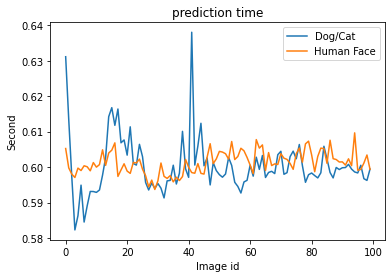

In [21]:
import os
import matplotlib.pyplot as plt


f1 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTime2.txt', 'r')
f2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTimeFace2.txt', 'r')


prTime1 = f1.read()
prTime1 = prTime1[1:len(prTime1)-1].split(',')
listTime =[]
for item in prTime1 :
  temp = float(item)
  listTime.append(temp)


prTime2 = f2.read()
prTime2 = prTime2[1:len(prTime2)-1].split(',')
listTime2 =[]
for item in prTime2 :
  temp = float(item)
  listTime2.append(temp)

plt.plot(listTime, label='Dog/Cat')
plt.plot(listTime2, label='Human Face')

plt.xlabel("Image id")
plt.ylabel("Second")
f1.close()
f2.close()

plt.title('prediction time')
plt.legend()
plt.show()

In [22]:
import numpy as np


sorted = np.sort(listTime)
myData = sorted[5:95]
print((myData))
print('Count: ',len(myData))


sorted2 = np.sort(listTime2)
myData2 = sorted2[5:95]
print((myData2))
print('Count: ',len(myData2))



[0.5927  0.59288 0.59312 0.59314 0.59356 0.59356 0.594   0.59406 0.59456
 0.59492 0.59498 0.59524 0.59538 0.59552 0.59568 0.59572 0.59572 0.59582
 0.59612 0.59626 0.59626 0.59628 0.59674 0.59696 0.59696 0.59708 0.59712
 0.59712 0.59716 0.59746 0.59762 0.59776 0.59786 0.59788 0.59798 0.59806
 0.59818 0.59828 0.59834 0.59836 0.5984  0.59844 0.59848 0.5985  0.59864
 0.59882 0.59902 0.59932 0.59936 0.59944 0.59946 0.59952 0.59982 0.59988
 0.5999  0.60038 0.60044 0.60048 0.60052 0.60054 0.60054 0.60058 0.60058
 0.60078 0.60102 0.60126 0.6023  0.60236 0.60258 0.6027  0.60274 0.6028
 0.60294 0.60296 0.60328 0.60338 0.6035  0.60446 0.6045  0.60588 0.60594
 0.60638 0.60642 0.60686 0.60766 0.61008 0.61136 0.61178 0.61236 0.6134 ]
Count:  90
[0.59634 0.59682 0.59708 0.59716 0.59734 0.59738 0.5974  0.59758 0.5976
 0.59802 0.59804 0.59816 0.59824 0.59824 0.59828 0.59846 0.5987  0.59888
 0.59896 0.59904 0.59906 0.59912 0.5992  0.59936 0.59938 0.59938 0.5994
 0.59972 0.59978 0.59996 0.6     0.6001  0

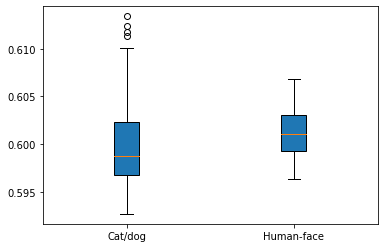

In [24]:

box_plot_data=[myData,myData2]
box=plt.boxplot(box_plot_data,patch_artist=True,labels=['Cat/dog','Human-face'])
plt.show()

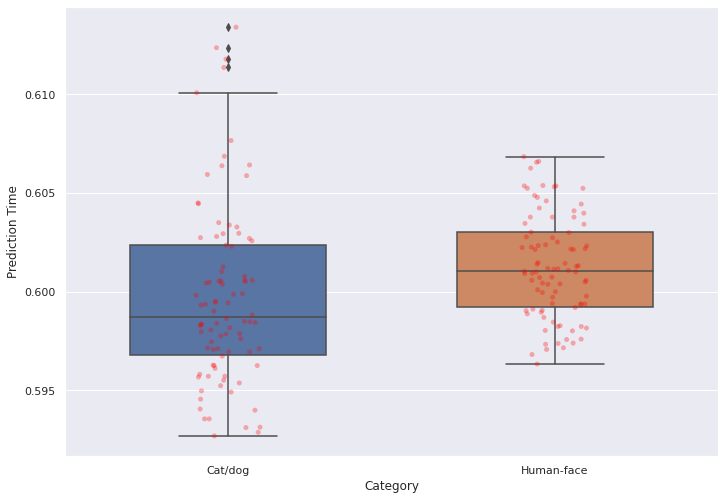

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# seed for random numbers
np.random.seed(31)
# Generating Data
df = pd.DataFrame({
    'Cat/dog': myData,
    'Human-face': myData2
})
data_df = df.melt(var_name='Category',value_name='Prediction Time')

sns.set(rc={'figure.figsize':(11.7,8.27)})
# boxplot with jittered data points in python
sns.boxplot(x = "Category",
            width=0.6,
            y = "Prediction Time",
            data = data_df)
sns.stripplot(x = "Category",
              y = "Prediction Time",
              alpha=0.3,
              color='red',
              data = data_df)

In [ ]:
import time
import os
import statistics

imageSize = []
ave = []
predictTimeFile = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/predictTime.txt', 'w')
aveFile = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTime.txt', 'w')

for i in range(100):
  predictTime = []
  filename = folder + 'image- (' + str(i+1) + ').jpg'
  image = load_img(filename, target_size=(224, 224,3))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)

  for j in range(50):
    # predict the probability across all output classes
    start_time = time.time()
    yhat = model.predict(image)
    end_time = round((time.time() - start_time + 0.0001),3)
    predictTime.append(end_time)

  predictTimeFile.write(str(predictTime))
  ave.append(statistics.mean(predictTime))
  imageSize.append(image.size)
  # convert the probabilities to class labels
  label = decode_predictions(yhat)
  #print(label)
  # retrieve the most likely result, e.g. highest probability
  label = label[0][0]
  # print the classification
  # print(i+1, '- %s (%.2f%%)' % (label[1], label[2]*100))

aveFile.write(str(ave))
aveFile.close()

predictTimeFile.close()


49152/35363 [=========================================] - 0s 0us/step


In [ ]:

ave2 = []

predictTimeFile2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/predictTimeFace.txt', 'w')

for i in range(100):
  predictTime = []
  filename = folder2 + 'image- (' + str(i+1) + ').jpg'
  image = load_img(filename, target_size=(224, 224,3))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)

  for j in range(50):
    start_time = time.time()
    # predict input
    yhat = model.predict(image)
    end_time = round((time.time() - start_time + 0.0001),3)
    predictTime.append(end_time)

  predictTimeFile2.write(str(predictTime)+ '\n')
  ave2.append(statistics.mean(predictTime))

  # imageSize.append(image.size)
  # convert the probabilities to class labels
  label = decode_predictions(yhat)
  #print(label)
  # retrieve the most likely result, e.g. highest probability
  label = label[0][0]
  # print the classification
  # print(i+1, '- %s (%.2f%%)' % (label[1], label[2]*100))

aveFile2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTimeFace.txt', 'w')
aveFile2.write(str(ave2))
aveFile2.close()

predictTimeFile2.close()

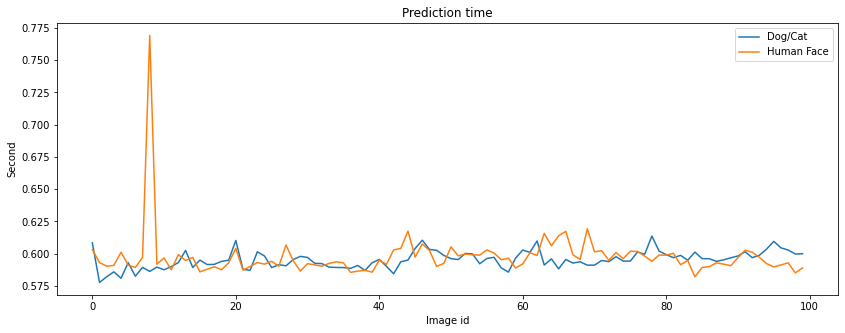

In [ ]:

f1 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/1st_Run/aveTime.txt', 'r')
f2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/1st_Run/aveTimeFace.txt', 'r')


prTime1 = f1.read()
prTime1 = prTime1[1:len(prTime1)-1].split(',')
listTime =[]
for item in prTime1 :
  temp = float(item)
  listTime.append(temp)


prTime2 = f2.read()
prTime2 = prTime2[1:len(prTime2)-1].split(',')
listTime2 =[]
for item in prTime2 :
  temp = float(item)
  listTime2.append(temp)

plt.plot(listTime, label='Dog/Cat')
plt.plot(listTime2, label='Human Face')
plt.xlabel("Image id")
plt.ylabel("Second")
plt.rcParams["figure.figsize"] = (14,5)
f1.close()
f2.close()

plt.title('Prediction time')
plt.legend()
plt.show()

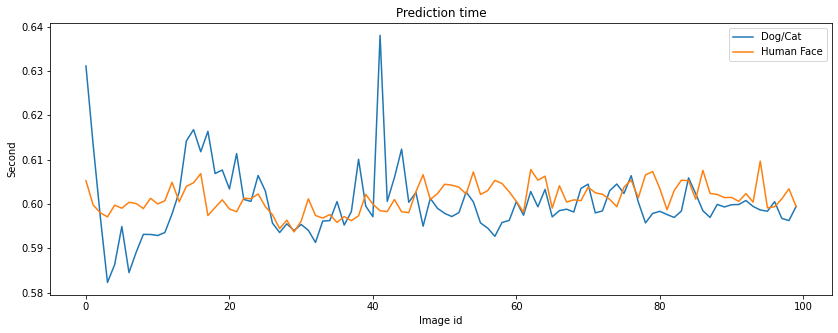

In [ ]:
import os
import matplotlib.pyplot as plt


f1 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTime2.txt', 'r')
prTime1 = f1.read()
f1.close()
prTime1 = prTime1[1:len(prTime1)-1].split(',')
listTime =[]
for item in prTime1 :
  temp = float(item)
  listTime.append(temp)


f2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTimeFace2.txt', 'r')
prTime2 = f2.read()
f2.close()
prTime2 = prTime2[1:len(prTime2)-1].split(',')
listTime2 =[]
for item in prTime2 :
  temp = float(item)
  listTime2.append(temp)


plt.plot(listTime, label='Dog/Cat')
plt.plot(listTime2, label='Human Face')
plt.xlabel("Image id")
plt.ylabel("Second")
plt.title('Prediction time')
plt.rcParams["figure.figsize"] = (14,5)
plt.legend()
plt.show()

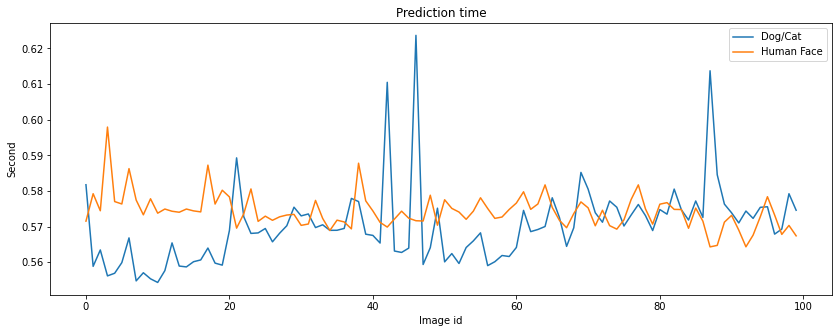

In [ ]:
import os
import matplotlib.pyplot as plt


f1 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTime.txt', 'r')
f2 = open('/content/drive/MyDrive/Mahdi PhD/Papers/Code/aveTimeFace.txt', 'r')


prTime1 = f1.read()
prTime1 = prTime1[1:len(prTime1)-1].split(',')
listTime =[]
for item in prTime1 :
  temp = float(item)
  listTime.append(temp)


prTime2 = f2.read()
prTime2 = prTime2[1:len(prTime2)-1].split(',')
listTime2 =[]
for item in prTime2 :
  temp = float(item)
  listTime2.append(temp)

plt.plot(listTime, label='Dog/Cat')
plt.plot(listTime2, label='Human Face')
plt.xlabel("Image id")
plt.ylabel("Second")
plt.rcParams["figure.figsize"] = (14,5)
f1.close()
f2.close()

plt.title('Prediction time')
plt.legend()
plt.show()